# Algorithms of Scientific Computing

## Exercise 1

In the last worksheet we showed that the $a_k$ and $b_k$ can be computed by
\begin{equation}
    c_k = \frac{1}{12} \sum\limits_{l=0}^{11} X_l e^{-i2\pi kl/12},
\end{equation}
i.e. by a DFT.

Use the idea of the Fast Fourier Transformation, to reduce this DFT of length 12 to the computation of some DFTs of length 6 or 3, respectively.

Use the fact that all $X_l \in \mathbb{R}$.

Draw a diagram, that shows the needed computation steps or write an appropriate program (for example in Python).

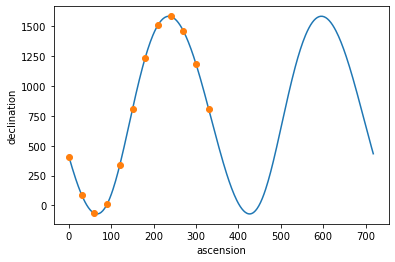

In [2]:
import cmath
import math


def dft3(X):
    c0 = np.sum(X)
    c1 = np.sum([X[l]*cmath.exp(-2*math.pi*l*1J/3) for l in range(0,3)])
    c2 = c1.conjugate()
    return [c0, c1, c2]

def rfft6(X):
    c1 = dft3([X[2*l] for l in range(0,3)])
    c2 = dft3([X[2*l+1] for l in range(0,3)])
    c = [c1[k]+c2[k]*cmath.exp(-math.pi*k*1J/3) for k in range(0,3)] + [c1[0]-c2[0]]
    c = c + [c[6-k].conjugate() for k in range(4,6)]
    return c

def rfft12(X):
    c1 = rfft6([X[2*l] for l in range(0,6)])
    c2 = rfft6([X[2*l+1] for l in range(0,6)])
    c = [(c1[k]+c2[k]*cmath.exp(-math.pi*k*1J/6))/12 for k in range(0,6)] + [(c1[0]-c2[0])/12]
    c = c + [c[12-k].conjugate() for k in range(7,12)]
    return c

## test with last WS data to see if this work
import numpy as np
import matplotlib.pyplot as plt
import math

X = [408, 89, -66, 10, 338, 807, 1238, 1511, 1583, 1462, 1183, 804]

c = np.array(rfft12(X))

a = c.real
a[1:6] = np.product([[2],a[1:6]])
b = np.product([[-2],c[1:6].imag])

#generate interpolation point
def Xint_gen(a,b,t):
    return sum([a[k]*math.cos(math.pi*k*t/180) for k in range(0,7)]) + \
        sum([b[k-1]*math.sin(math.pi*k*t/180) for k in range(1,6)])

# plotting interpolation results and initial data
resolution = 2
plt.plot(range(0,720,resolution), [Xint_gen(a,b,t) for t in range(0,720,resolution)])
plt.plot(range(0,360,30), X, 'o');
plt.xlabel('ascension')
plt.ylabel('declination')
plt.show()